In [2]:
pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)


60000

In [6]:
X_train[0]
X_train=X_train/255
X_test=X_test/255

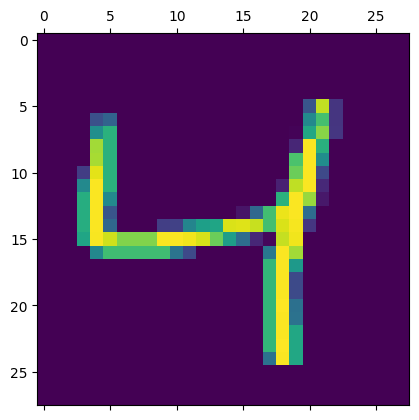

In [7]:
plt.matshow(X_train[2])

In [8]:
#Flatten Dataset
#use reshape of pandas
# X_train.shape(600000,28,28) to (600000,784)
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [9]:
X_test_flattened.shape

(10000, 784)

In [10]:
#Create simple neuron network
#INPUT LAYER 784 ELEMENTS
#OUTPUT LAYER 10 ELEMENTS(0-9)
model=keras.Sequential([
  keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=5)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8229 - loss: 0.7034
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9133 - loss: 0.3115
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9207 - loss: 0.2847
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9235 - loss: 0.2716
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9249 - loss: 0.2650


In [11]:
#Evaluate the model on test data
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9135 - loss: 0.3096


[0.27122822403907776, 0.9254000186920166]

In [14]:
y_predicted=model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


array([2.6296970e-01, 6.6287480e-03, 9.9965870e-01, 5.6712067e-01,
       9.6437902e-10, 8.5332966e-01, 9.1531312e-01, 1.0013567e-12,
       2.0858391e-01, 2.5484643e-09], dtype=float32)

In [16]:
#predicted value>> argmax returns index of maximum 
np.argmax(y_predicted[1])

2

In [18]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    2,    3,    0,    5,   11,    3,    3,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  921,   24,    7,    3,   13,   10,   37,    5],
       [   0,    0,   14,  946,    1,   14,    2,    7,   18,    8],
       [   1,    1,    4,    2,  916,    0,   10,    3,   10,   35],
       [   8,    3,    3,   56,   11,  744,   14,    6,   39,    8],
       [   7,    3,    6,    2,    7,    6,  921,    2,    4,    0],
       [   1,    6,   21,   10,    9,    0,    0,  935,    1,   45],
       [   4,    7,    6,   32,    9,   16,    8,    9,  869,   14],
       [   7,    7,    2,   15,   25,    3,    0,    9,    5,  936]])>

Text(95.72222222222221, 0.5, 'truth')

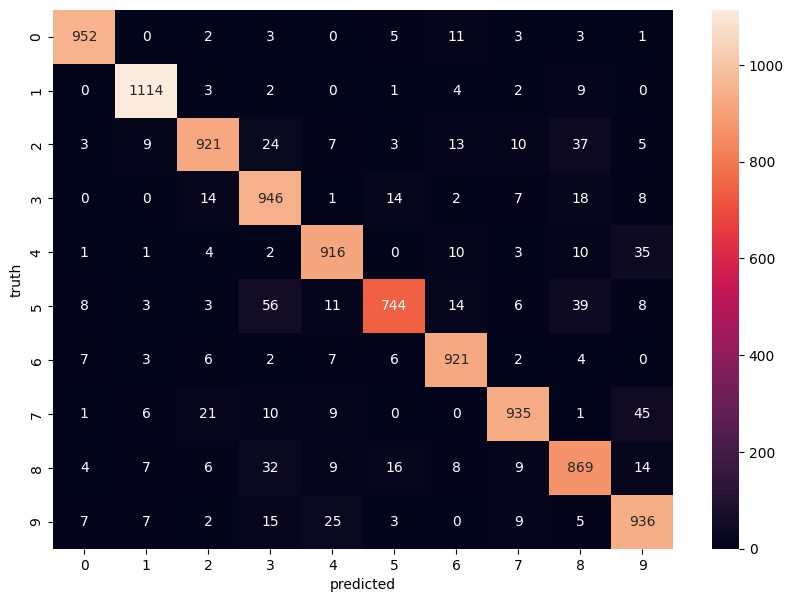

In [19]:
#visually better 
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [20]:
#Add a hidden layer 
model=keras.Sequential([
  keras.layers.Dense(100,input_shape=(784,),activation='relu'),
  keras.layers.Dense(10,activation='sigmoid')#last layer dont need input shape ,automatically it will figure out
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=5)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8720 - loss: 0.4600
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9638 - loss: 0.1259
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9742 - loss: 0.0880
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9815 - loss: 0.0640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0468


In [21]:
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9718 - loss: 0.0893


[0.07517457753419876, 0.9758999943733215]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'truth')

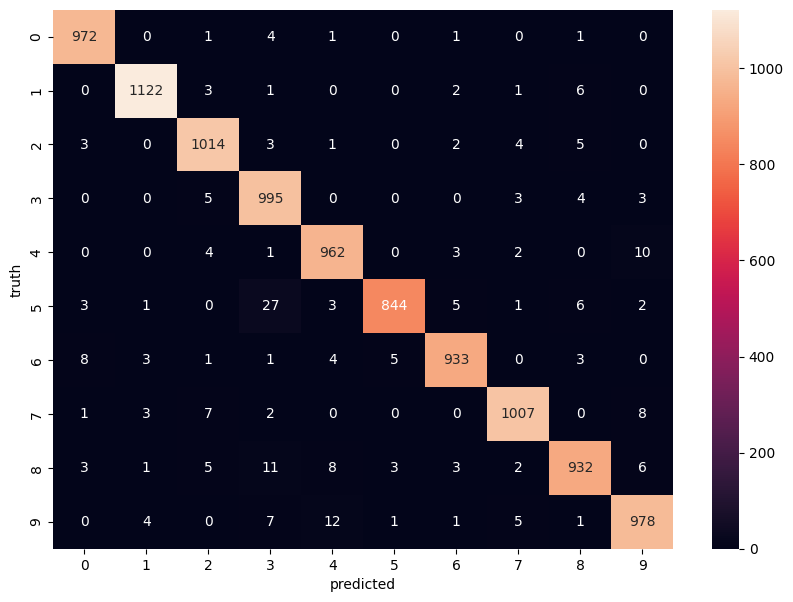

In [23]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
#improvements

In [27]:
#keras come with a flatter
model=keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(200,activation='tanh'),
  keras.layers.Dense(10,activation='sigmoid')#last layer dont need input shape ,automatically it will figure out
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,Y_train,epochs=9)

Epoch 1/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8793 - loss: 0.4097
Epoch 2/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9605 - loss: 0.1365
Epoch 3/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9744 - loss: 0.0851
Epoch 4/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9833 - loss: 0.0581
Epoch 5/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9881 - loss: 0.0421
Epoch 6/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0300
Epoch 7/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9951 - loss: 0.0206
Epoch 8/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9962 - loss: 0.0160
Epoch 9/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9974 - loss: 0.0116
